# Статистика, DS-поток
## Практическое задание 3


**Правила:**

* Дедлайн **28 сентября 16:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 &mdash;  5 баллов
* Задача 2 &mdash;  15 баллов

**Важность задач:**

* *высокая:* задача 1;
* *средне-высокая:* задача 2.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

_______
## Задача 1.
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [113]:
def draw_likelihood(density_function, grid, samples, label):
    '''
    Изображает график функции правдоподобия для каждой из 3 выборок.
    
    Аргументы:
        density_function --- функция, считающая плотность 
            (обычную или дискретную). На вход данная функция 
            должна принимать массив размера (1, len_sample)
            и возвращать массив размера (len_grid, len_sample).
        grid --- массив размера (len_grid, 1), являющийся 
                 сеткой для построения графика;
        samples --- три выборки;
        label --- latex-код параметрической модели.
    '''
    
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = np.prod(density_function(sample), axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

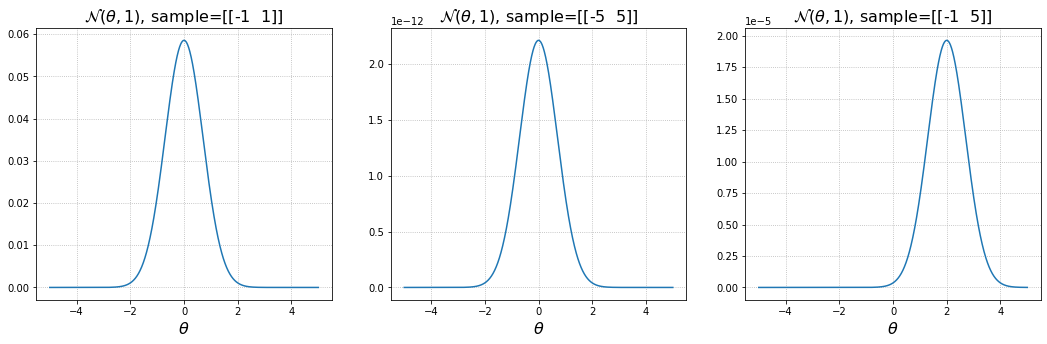

In [114]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

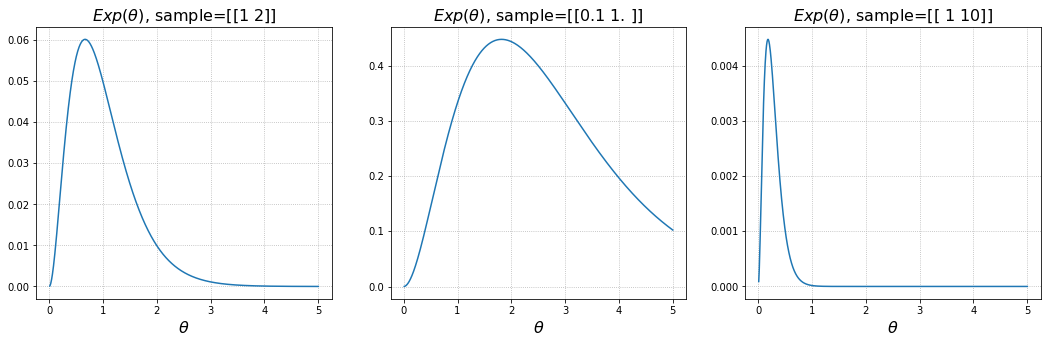

In [120]:
grid_expon = np.linspace(0.01, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=1 / grid_expon).pdf, grid_expon, 
                [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')

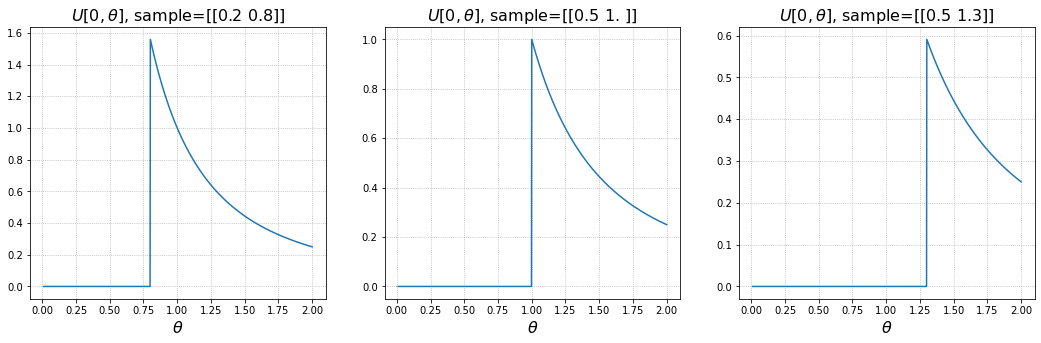

In [34]:
grid_uniform = np.linspace(0.01, 2, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(loc=0, scale=grid_uniform).pdf, grid_uniform,
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U[0, \\theta]$')

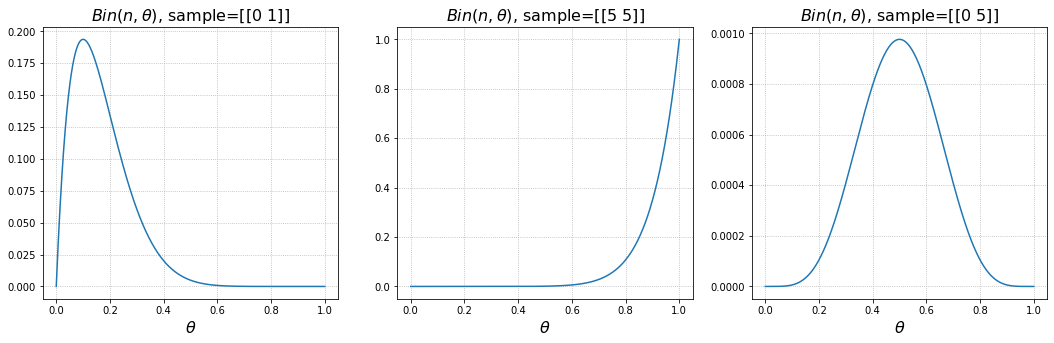

In [37]:
grid_bin = np.linspace(0, 1, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(n=5, p=grid_bin).pmf, grid_bin,
               [[0, 1], [5, 5], [0, 5]], '$Bin(n, \\theta)$')

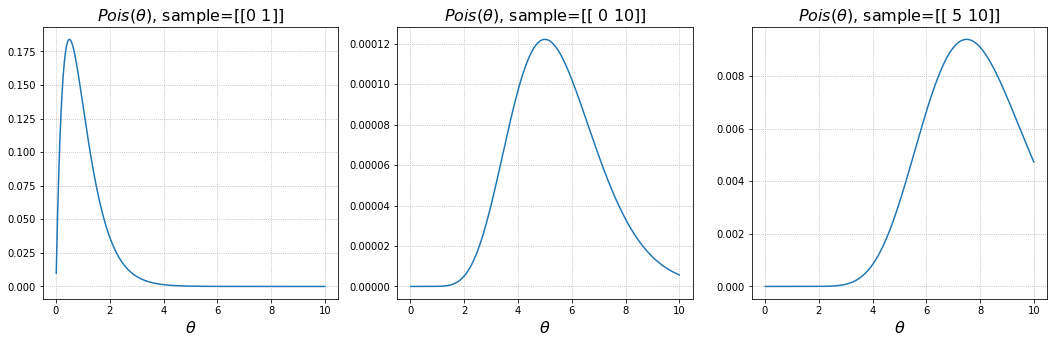

In [38]:
grid_pois = np.linspace(0.01, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=grid_pois).pmf, grid_pois,
               [[0, 1], [0, 10], [5, 10]], '$Pois(\\theta)$')

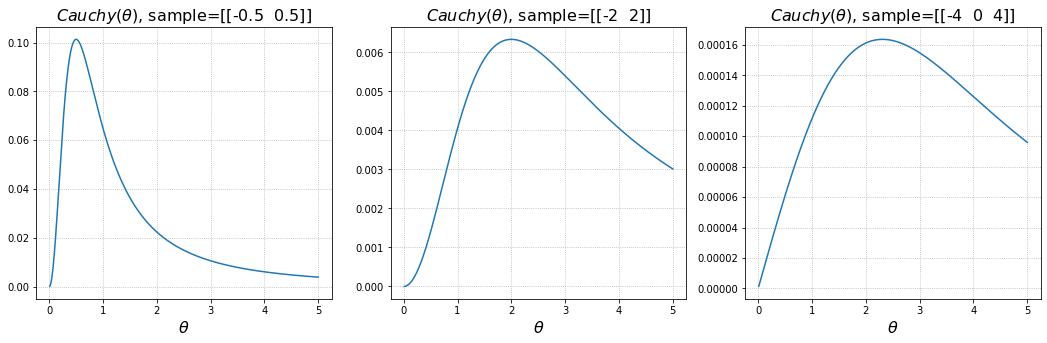

In [44]:
grid_cauchy = np.linspace(0.01, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(scale=grid_cauchy).pdf, grid_cauchy,
               [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$Cauchy(\\theta)$')

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:** по графикам видно, что оценки параметров всех распределений хорошо приближают эти параметры (даже для распределения Коши все хорошо, хотя мы помним, что, вообще говоря, "ручками" посчитать оценку максимального правдоподобия для распределения Коши нам не удавалось). При этом поведение графиков нормального, экспоненциального, биномиального и пуассоновского распределений совпадает с поведением графиков плотностей этих распределений(у двух последних если график их плотности аппроксимировать кривой), однако функция правдоподобия зачастую не является плотностью какого-либо распределения. Это легко понять, так как интеграл от произведения плотностей по всему пространству в точках выборки зачастую не равен 1. Она, как было отмечено выше, является произведением плотностей в точках выборки.

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [57]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:** дело в том, что, как уже было отмечено выше, функция правдоподобия &mdash; это произведение плотностей в точках выборки, а так как точек много, а плотность во всех точках меньше 1 (даже в нуле &mdash; точке с максимальной плотностью распределения $\mathcal{N}(0, 1)$ &mdash; плотность имеет значение $\frac{1}{\sqrt{2 \pi}}$), а, как известно, при перемножении огромного количества чисел, меньших единицы, мы получаем довольно близкое к нулю значение. Постараемся это исправить.

In [58]:
sample = sps.norm.rvs(size=10**5)
log_likelihood = sps.norm.logpdf(sample).sum()
print(log_likelihood)

-142022.50535210286


Мы нашли логарифмическую функцию правдоподобия. Как видно, если возвести экспоненту в полученную степень, то действительно получится число, очень близкое к нулю, из-за чего ввиду машинного округления мы получали, что функция правдоподобия принимала нулевое значение.

______
## Задача 2. 
Компания выпустила $n$ серверов новой модели с увеличенным сроком службы. До начала продаж компания должна провести эксперимент по оценке среднего срока службы серверов. Известно, что сервера могут сломаться в любой момент независимо от того, сколько времени уже проработали. Таким образом, распределение времени работы сервера до поломки обладает свойством отсутствия памяти. Как вы знаете, таким свойством среди непрерывных распределений обладает только экспоненциальное распределение.

Компания начала проводить эксперимент, но сервера получились настолько хорошими, что многие еще не сломались, а бизнес уже требует запускать их продажи. Тем самым усложняется задача для аналитиков, которым приходит "обрезанная" выборка.

Рассмотрим задачу более формально. Пусть $X = (X_1, \ldots, X_n)$ &mdash; выборка из экспоненциального распределения с параметром $\theta$ с плотностью $p_\theta(x) = \theta e^{-\theta x}I\{x \geq 0\}$. \
При этом наблюдается выборка $Y = (Y_1, \ldots, Y_n)$, где, $Y_i$ определены следующим образом:
$$
\begin{equation}
  Y_i=\begin{cases}
    X_i, & \text{если $X_i \leq c$}.\\
    c, & \text{если $X_i > c$}.
  \end{cases}
\end{equation}
$$
Иначе говоря, $Y_i = \min(X_i, c)$, где $c$ &mdash; некоторая константа.
Выборка является смесью непрерывного и дискретного распределения, поэтому функция правдоподобия не определена. Вам предлагается реализовать и сравнить три подхода к оценке неизвестного параметра:
1. Рассмотреть подвыборку, состоящую из $Y_i < c$, и найти для нее ОМП. Учтите, что необходимо использовать условное распределение $Y_i$ при условии $Y_i < c$.
2. Найти оценку, используя метод моментов.
3. Найти ОМП по дискретизованной выборке, выполнив следующие действия.

    а) Разбить полуинтервал $[0, c)$ на $k$ бинов (множеств) вида $[a_i, a_{i+1})$, где $0=a_0<a_1<...<a_k=c$. В качестве границ бинов возьмите целые числа.
    
    б) Определить $Z_i$ как номер бина, в который попадает $Y_i$, считая при этом множество $\{c\}$ как $(k+1)$-й бин. Вам может помочь функция [`np.digitize`](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html).
    
    в) Найти вероятности $p_j(\theta) = \mathsf{P}_\theta(Z_1 = j)$, которые определяют распределение $Z_i$, являющееся дискретным.
    
    г) Найти ОМП по выборке $Z_1, ..., Z_n$, используя ее распределение.

Рассмотрите $c = 10$, а в качестве истинного значения параметра возьмите $\theta = 0.15$. Обратите внимание на параметризацию в [`scipy.stats.expon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).
Получить точный ответ в виде формулы у вас скорее всего не получится, воспользуйтесь численными методами.

Насколько точной получается оценка в зависимости от подхода и размера выборки?

**Решение:**

In [561]:
c = 10
theta = 0.15
size_of_sample = int(1e5)
exp_array = lambda size: sps.expon(scale=1/theta).rvs(size=size)
log_density_exp = lambda Y: sps.expon(scale=1 / grid).logpdf(Y)
grid = np.linspace(0.1, 0.2, 1000).reshape((-1, 1))

*1) Реализуем первый метод:* запишем условную плотность: $p(Y_i | Y_i < c) = \frac{p(Y_i, Y_i < c)}{P(Y_i < c)} = \frac{p(Y_i)I(Y_i < c)}{P(Y_i < c)} = \frac{p(X_i)I(Y_i < c)}{F_X(C)} = \frac{(\theta e^{- \theta X_i})I(Y_i < c)}{1 - e^{- \theta c}}.$ Итого: если мы выбросим значения, большие $c$, то у нас будут случайные величины, которые подчиняются экспоненциальному распределению с тем же параметром ($F_X(c)$ выступает нормировочным коэффициентом, чтоб интеграл сошелся к 1 после того, как мы выкинули хвост). Для полученного распределения и применим метод максимального правдоподобия.

In [562]:
def log_conditional_dencity(Y):
    density_exp = log_density_exp(Y)
    density_exp = density_exp - np.log(1 - np.exp(-grid * c))
    return density_exp

def OMP_for_small_Y(Y):
    Y_small = Y[Y < c]
    size_of_small_Y = len(Y_small)
    log_density = log_conditional_dencity(Y_small)
    log_likelihood = np.sum(log_density, axis=1)
    argmax = np.argmax(log_likelihood)
    max_likelihood = grid[argmax]
    return *max_likelihood, log_likelihood, size_of_small_Y

In [563]:
X = exp_array(size_of_sample)
Y = X.copy()
np.putmask(Y, [Y > c], c)
estimation, log_likelihood, size_of_small_Y = OMP_for_small_Y(Y)
estimation

0.15095095095095096

In [564]:
def draw_log_likelihood(log_likelihood, label):
    '''
    Изображает график функции правдоподобия.
    
    Аргументы:
        grid --- массив, являющийся сеткой для построения графика;
        log_likelihood - вычисленная логарифмическая функция правдоподобия;
        label --- заголовок графика.
    '''

    plt.figure(figsize=(12, 8))

    plt.plot(grid, log_likelihood)
    plt.xlabel('$\\theta$', fontsize=16)
    plt.grid(ls=':')
    plt.title(label)
    plt.show()

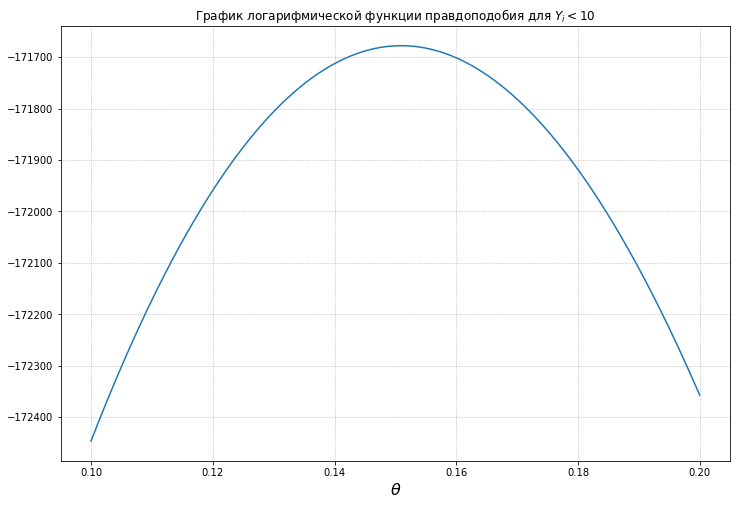

In [565]:
draw_log_likelihood(log_likelihood, 'График логарифмической функции правдоподобия для $Y_i < 10$')

In [566]:
size_of_small_Y

77586

*Вывод по первой части*: как видно из графика и полученного $argmax \ l_X(\theta)$, оценка максимального правдоподобия довольно хорошо совпадает с оцениваемым параметром, хотя размер рассматриваемой выборки и несколько меньше, чем размер изначальной, поэтому мы немного теряем в точности.

*2) Реализуем второй метод:* у нас один неизвестный параметр, поэтому нам надо найти только первый момент, то есть, матожидание. Предлагается оценить матожидание  с помощью среднего значения элементов, посчитать матожидание экспоненциального распределения при $x < 10$ и взять атомарную плотность в точке 10. Опущу некоторые преобразования и сразу запишу ответ: $EY_1 = \frac{F_{X_1}(c)}{\theta}.$ Функцию распределения в точке $c$ предлагаю оценить через частоту события $Y_i < c$, что то же самое, что и событие $X_i < c$. Пусть всенго $n$ элементов в выборке и ровно $k$ из элементов меньше $c$. Тогда матожидание $Y_1$ можно оценить следующим образом: $EY_1 = \frac{k}{n \theta}$, откуда по методу моментов оценка для $\theta$: $\frac{k}{n X_{cp}.}$ 

In [567]:
def count_theta_with_moment_method(Y):
    '''оценивает $\theta$ с помощью метода моментов, считая среднее по выборке Y'''
    Y_small = Y[Y < c]
    k = len(Y_small)
    return k / (len(Y) * np.average(Y))

In [568]:
X = exp_array(size_of_sample)
Y = X.copy()
np.putmask(Y, [Y > c], c)
count_theta_with_moment_method(Y)

0.15013905483210038

*Вывод по второй части*: оценка достаточно точная. Конечно, мы оцениваем 2 параметра: сначала функцию распределения через частоту события $X_i < c$, а потом через с помощью этой оценки получаем оценку для $\theta$, поэтому слишком точное значение искомого параметра получить не получится, но кажется, что данный метод уже способен оценить довольно хорошо.

*3) Реализуем третий метод.* Посчитаем $p_j(\theta) = \mathsf{P}_\theta(Z_1 = j)$ (нумеруем $j$ с нуля). Эта величина также равна вероятности того, что $X_1$ лежит между $j - 1$ и $j$, поэтому $p_j(\theta) = F_{\theta}(j) - F_{\theta}(j - 1)$.

In [588]:
k = 11
grid_Z = np.linspace(0, c, k)
grid_Z

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [589]:
X = exp_array(size_of_sample)
Y = X.copy()
np.putmask(Y, [Y > c], c)
Z = np.digitize(Y, grid_Z, right=False) - 1
Z

array([10,  1,  6, ...,  1,  1,  4], dtype=int64)

In [590]:
count = []
for j in grid_Z:
    count = np.append(count, len(Z[Z == j]))

count

array([13920., 11993., 10372.,  8916.,  7640.,  6730.,  5596.,  4927.,
        4095.,  3512., 22299.])

In [591]:
def count_log_likelihood(count, theta):
    log_likelihood = count[0] * np.log(1 - np.exp(-theta))
    log_likelihood = log_likelihood - 10 * theta * count[-1]
    for j in range (1, 10):
        log_likelihood = log_likelihood - ((j * theta - np.log(1 - np.exp(-theta))) * count[j])
    return log_likelihood

In [592]:
def OMP_for_discrete(Z):
    log_likelihood = count_log_likelihood(count, grid)
    argmax = np.argmax(log_likelihood)
    max_likelihood = grid[argmax]
    return *max_likelihood, log_likelihood

In [593]:
max_likelihood, log_likelihood = OMP_for_discrete(Z)
max_likelihood

0.15025025025025027

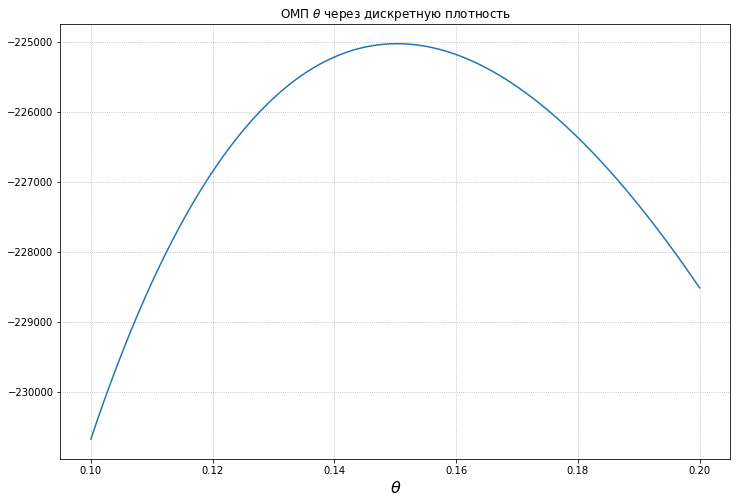

In [594]:
draw_log_likelihood(log_likelihood, 'ОМП $\\theta$ через дискретную плотность')

*Вывод по третьей части*: оценка имеет примерно такую же точность, как и во второй части. Недостаток этой оценки заключается в том, что она оценивает по классам вне зависимости от того, ближе к какой границе случайная величина (а размер бина равен 1, и довольно существенно, у нас случайная величина, например, 1.1 или 1.9).

**Вывод:** как показывает данная задача, каждый из 3 методов при их правильной реализации может быть применим (погрешность каждого метода меньше 0.001, а относительная погрешность меньше процента). У каждого метода есть свои преимущества и недостатки, и можно использовать подходящий метод в зависимости от задачи.